## 시험준비

In [3]:
import pandas as pd
import numpy as np
import missingno as msno
import sklearn
import sklearn.linear_model
import matplotlib.pyplot as plt

> 기발한 풀이이거나, 논리가 우수하거나... 센스가 요구되는 문제를 중간중간 배치할 건데, 그것을 잘 해결하면 2배까지 가산점을 줄거임. 자료분석 2에 해당, 아마 거의 못받을듯... 한두명 정도?
>
> 아이디어 정도만 제시해도 가산점 부여가 가능하다.
>
> 자료에 대한 이해가 상당히 중요하다...
>
> 결측치가 있을 경우 몇몇은 impute, 몇몇은 drop 등등...

> 연구 문항의 경우에는 그냥 세부지침만 잘 수행하자.
>
> 또한 시각화 한 결과에 대한 이유를 서술하자. 의미를 이해하도록 노력해야 함.

1. True or False

> True인지 False인지 적기만 하면 됨. 설명 필요 없음. (최대한 신속하고 정확하게 해야될 듯) 50문항 정도, 잘 읽고 True면 1, False면 0이게 하고, 길이가 50인 리스트로 정리할 것. 그리고 Kaggle Competition에 제출할 것.

> 다 0이라고 써놓고 적합할 수도 있음... ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 그냥 읽어보고 하는 게 더 빨라요~
>
> 1번에서는 50점을 맞을 수 있게 설계하는 게 목표입니당... kaggle 사용법을 확실하게 알아두는 게 목적
>
> 어차피 submission은 jupyter notebook file

In [6]:
df = pd.DataFrame({'submit' : [0,1,0,1,0,0,0]})
df.to_csv('submission.csv', index = False)  ## 아마 이게 되지 않을까...

,submit
0,0
1,1
2,0
3,1
4,0
5,0
6,0


2. 자료분석

> 지침에 맞게 자료를 해석하고 세부지침에 맞추어 분석

> 단순히 자료를 분석하는 것을 넘어, 전처리하고, 설명변수 간 상관관계를 분석하는 등...

In [4]:
df_train = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/icesales_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/icesales_test.csv')

(1) 위의 자료를 해석하고, 세부지침에 맞추어 분석하라.

> 세부지침 :
>
> 반응변수 y를 sales로 설정하고 나머지는 설명변수로
>
> sklearn.linear_model의 하위 모듈로 적합
>
> df_test에 sales에 대한 예측값을 포함하는 열을 만들어라.

In [5]:
df_train.head()

,temp,type,sales
0,-4.1,choco,10.900261
1,-3.7,choco,14.002524
2,-3.7,vanilla,26.008644
3,-3.0,choco,15.928335
4,-1.3,vanilla,29.597396


In [6]:
df_test.head()

,temp,type
0,-4.1,vanilla
1,-3.0,vanilla
2,-0.5,vanilla
3,0.4,choco
4,0.7,vanilla


\- sales를 y로 하는 산점도 시각화

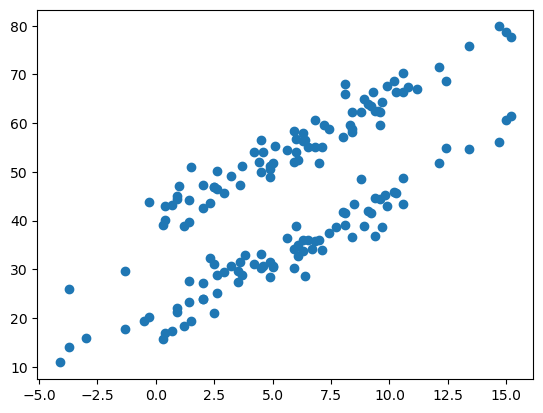

In [7]:
plt.plot(df_train.temp, df_train.sales, 'o')
plt.show()

> type에 따라 다른 게 있을 것으로 예상됨.

In [8]:
set(df_train.type)

{'choco', 'vanilla'}

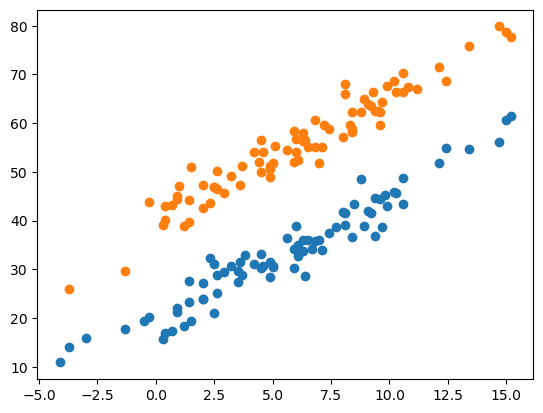

In [9]:
plt.plot(df_train.loc[df_train.type == 'choco'].temp, df_train.loc[df_train.type == 'choco'].sales, 'o')
plt.plot(df_train.loc[df_train.type != 'choco'].temp, df_train.loc[df_train.type != 'choco'].sales, 'o')

> type별 그려지는 그래프의 추세선이 다른 것 같다. 단, 설명변수 끼리의 교호작용은 없는 것 같다.

\- 따라서 그대로 적합해주도록 하자.

In [10]:
pd.get_dummies(df_train, drop_first = True)

,temp,sales,type_vanilla
0,-4.1,10.900261,False
1,-3.7,14.002524,False
2,-3.7,26.008644,True
3,-3.0,15.928335,False
4,-1.3,29.597396,True
...,...,...,...
155,14.7,79.846568,True
156,15.0,60.666163,False
157,15.0,78.713140,True
158,15.2,61.561043,False


\- 해당 데이터로 분석 시작

In [12]:
# 1
temp_X = pd.get_dummies(df_train, drop_first = True)
temp_XX = pd.get_dummies(df_test, drop_first = True)

X = temp_X.drop('sales', axis = 1)
y = temp_X.sales
XX = temp_XX

# 2
predictr = sklearn.linear_model.LinearRegression()

# 3
predictr.fit(X, y)

LinearRegression()

In [13]:
predictr.score(X, y)

0.9654005189701877

\- 적합이 잘 되었는지 시각화

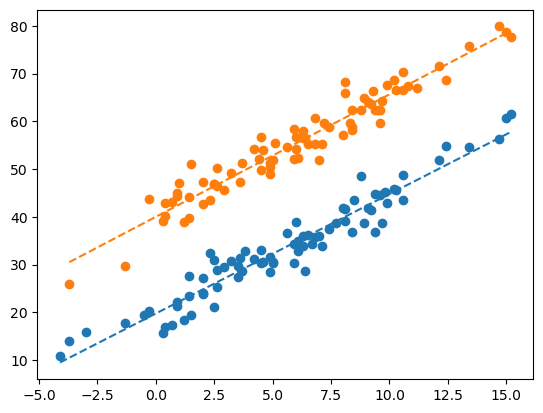

In [14]:
plt.plot(df_train.loc[df_train.type == 'choco'].temp, df_train.loc[df_train.type == 'choco'].sales, 'o')
plt.plot(df_train.loc[df_train.type != 'choco'].temp, df_train.loc[df_train.type != 'choco'].sales, 'o')
plt.plot(df_train.loc[df_train.type == 'choco'].temp, df_train.assign(sales_hat = predictr.predict(X)).loc[df_train.type == 'choco'].sales_hat, '--', color = 'C0')
plt.plot(df_train.loc[df_train.type != 'choco'].temp, df_train.assign(sales_hat = predictr.predict(X)).loc[df_train.type != 'choco'].sales_hat, '--', color = 'C1')
plt.show()

In [15]:
df_test = df_test.assign(sales_hat = predictr.predict(XX))
df_test

,temp,type,sales_hat
0,-4.1,vanilla,29.476820
1,-3.0,vanilla,32.297585
2,-0.5,vanilla,38.708416
3,0.4,choco,20.751692
4,0.7,vanilla,41.785614
5,0.7,choco,21.501976
6,1.0,choco,22.252261
7,1.5,choco,23.502734
8,1.5,vanilla,43.837080
9,2.0,vanilla,45.119246


(2) 아래의 자료를 해석하고 세부지침에 맞추어 분석하라.

In [45]:
df_train = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/synthetic_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/synthetic_test.csv')

In [46]:
display(df_train.head())
display(df_test.head())

,X1,X2,X3,y
0,0.634499,4.562448,-0.593678,2.915723
1,-4.801602,2.924129,-0.057827,-3.339538
2,4.295305,5.086878,-0.353763,6.838744
3,-0.210203,5.994217,-0.833309,2.786905
4,0.063574,5.508144,-0.112174,2.817646


,X1,X2,X3
0,-5.188183,5.355068,0.373713
1,-3.994075,6.607599,0.070830
2,-6.130300,5.909246,-0.505089
3,2.260182,7.382222,0.442493
4,2.022601,4.495572,0.016306


**세부지침**

1.  반응변수 ${\bf y}$를 `y`로 설정하고 나머지 `X1`,`X2`,`X3`는
    설명변수로 설정하라.
2.  `sklearn.preprocessing`내의 적절한 scaler릉 이용하여 설명변수를
    scaling하라.
3.  `df_test`에 y에 대한 예측값을 포함하는 열을 추가하라.

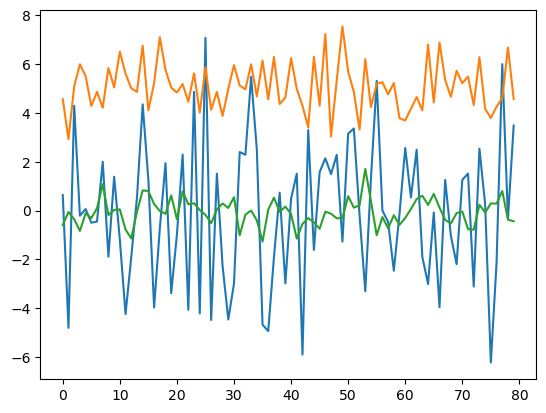

In [47]:
plt.plot(df_train.X1)
plt.plot(df_train.X2)
plt.plot(df_train.X3)

\- 스케일링

In [48]:
sclr = sklearn.preprocessing.StandardScaler()

pd.DataFrame(sclr.fit_transform(df_train.drop('y', axis = 1))).set_axis(df_test.columns, axis = 1)

,X1,X2,X3
0,0.244600,-0.517686,-0.982851
1,-1.593978,-2.180583,0.021108
2,1.482745,0.014612,-0.533353
3,-0.041092,0.935563,-1.431820
4,0.051504,0.442198,-0.080715
...,...,...,...
75,-2.073548,-1.298885,0.678153
76,-0.697106,-0.834611,0.664469
77,2.058969,-0.466625,1.631926
78,-0.081436,1.629464,-0.567107


In [49]:
## 1
X = pd.DataFrame(sclr.fit_transform(df_train.drop('y', axis = 1))).set_axis(df_test.columns, axis = 1)
y = df_train.y
XX = pd.DataFrame(sclr.transform(df_test)).set_axis(df_test.columns, axis = 1)

## 2
predictr = sklearn.linear_model.LinearRegression()

## 3
predictr.fit(X, y)

## 4
predictr.score(X, y)

1.0

In [50]:
pd.concat([X, y], axis = 1).assign(y_hat = predictr.predict(X))

,X1,X2,X3,y,y_hat
0,0.244600,-0.517686,-0.982851,2.915723,2.915723
1,-1.593978,-2.180583,0.021108,-3.339538,-3.339538
2,1.482745,0.014612,-0.533353,6.838744,6.838744
3,-0.041092,0.935563,-1.431820,2.786905,2.786905
4,0.051504,0.442198,-0.080715,2.817646,2.817646
...,...,...,...,...,...
75,-2.073548,-1.298885,0.678153,-4.323144,-4.323144
76,-0.697106,-0.834611,0.664469,-0.024730,-0.024730
77,2.058969,-0.466625,1.631926,8.305398,8.305398
78,-0.081436,1.629464,-0.567107,3.009442,3.009442


In [51]:
df_test.assign(yhat = predictr.predict(XX))

,X1,X2,X3,yhat
0,-5.188183,5.355068,0.373713,-2.510649
1,-3.994075,6.607599,0.070830,-0.690276
2,-6.130300,5.909246,-0.505089,-3.175676
3,2.260182,7.382222,0.442493,5.951293
4,2.022601,4.495572,0.016306,4.270387
5,-0.782962,4.982181,0.001587,1.708128
6,1.551188,4.832754,-0.381172,3.967565
7,0.272891,6.183472,0.180807,3.364626
8,0.792528,5.357520,0.499754,3.471288
9,0.621078,3.009435,0.155958,2.125796


In [33]:
predictr.coef_

array([2.95668797e+00, 4.92609652e-01, 5.09818192e-16])

> y는 X들을 표준화한 값의 선형 결합인 것으로 추정된다. 따라서 test set에서는 train셋과 따로 스케일링을 하는 게 좋을 것 같다.

In [38]:
sclr = sklearn.preprocessing.MinMaxScaler()

In [41]:
## 1
X = sclr.fit_transform(df_train.drop('y', axis = 1))
y = df_train.y
XX = sclr.fit_transform(df_test)

## 2
predictr = sklearn.linear_model.LinearRegression()

## 3
predictr.fit(X, y)

## 4
predictr.score(X, y)

1.0

In [42]:
df_test = df_test.assign(y_hat = predictr.predict(XX))
df_test

,X1,X2,X3,y_hat
0,-5.188183,5.355068,0.373713,-2.422851
1,-3.994075,6.607599,0.070830,-0.371621
2,-6.130300,5.909246,-0.505089,-3.227344
3,2.260182,7.382222,0.442493,7.319011
4,2.022601,4.495572,0.016306,5.519204
5,-0.782962,4.982181,0.001587,2.509428
6,1.551188,4.832754,-0.381172,5.148254
7,0.272891,6.183472,0.180807,4.372648
8,0.792528,5.357520,0.499754,4.541840
9,0.621078,3.009435,0.155958,3.103214


3. 연구

> 자료를 세부지침에 맞추어 연구

In [84]:
np.random.seed(43052)
df = pd.read_csv("https://raw.githubusercontent.com/guebin/MP2023/main/posts/employment_multicollinearity.csv")
df['employment_score'] = df.gpa * 1.0 + df.toeic* 1/100 + np.random.randn(500)

In [85]:
df

,employment_score,gpa,toeic,toeic0,toeic1,toeic2,toeic3,toeic4,toeic5,toeic6,...,toeic490,toeic491,toeic492,toeic493,toeic494,toeic495,toeic496,toeic497,toeic498,toeic499
0,1.784955,0.051535,135,129.566309,133.078481,121.678398,113.457366,133.564200,136.026566,141.793547,...,132.014696,140.013265,135.575816,143.863346,152.162740,132.850033,115.956496,131.842126,125.090801,143.568527
1,10.789671,0.355496,935,940.563187,935.723570,939.190519,938.995672,945.376482,927.469901,952.424087,...,942.251184,923.241548,939.924802,921.912261,953.250300,931.743615,940.205853,930.575825,941.530348,934.221055
2,8.221213,2.228435,485,493.671390,493.909118,475.500970,480.363752,478.868942,493.321602,490.059102,...,484.438233,488.101275,485.626742,475.330715,485.147363,468.553780,486.870976,481.640957,499.340808,488.197332
3,2.137594,1.179701,65,62.272565,55.957257,68.521468,76.866765,51.436321,57.166824,67.834920,...,67.653225,65.710588,64.146780,76.662194,66.837839,82.379018,69.174745,64.475993,52.647087,59.493275
4,8.650144,3.962356,445,449.280637,438.895582,433.598274,444.081141,437.005100,434.761142,443.135269,...,455.940348,435.952854,441.521145,443.038886,433.118847,466.103355,430.056944,423.632873,446.973484,442.793633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,9.057243,4.288465,280,276.680902,274.502675,277.868536,292.283300,277.476630,281.671647,296.307373,...,269.541846,278.220546,278.484758,284.901284,272.451612,265.784490,275.795948,280.465992,268.528889,283.638470
496,4.108020,2.601212,310,296.940263,301.545000,306.725610,314.811407,311.935810,309.695838,301.979914,...,304.680578,295.476836,316.582100,319.412132,312.984039,312.372112,312.106944,314.101927,309.409533,297.429968
497,2.430590,0.042323,225,206.793217,228.335345,222.115146,216.479498,227.469560,238.710310,233.797065,...,233.469238,235.160919,228.517306,228.349646,224.153606,230.860484,218.683195,232.949484,236.951938,227.997629
498,5.343171,1.041416,320,327.461442,323.019899,329.589337,313.312233,315.645050,324.448247,314.271045,...,326.297700,309.893822,312.873223,322.356584,319.332809,319.405283,324.021917,312.363694,318.493866,310.973930


**세부지침**

1.  종속변수 ${\bf y}$를 `employment_score`로 설정하고 나머지는
    설명변수로 설정하라.
2.  `sklearn.linear_model.Lasso`를 이용하여
    $\alpha =0,1,0.2, \dots, 1.9, 2.0$에 대해 predictor를 생성하라.
3.  $\alpha$의 변화에 따른 score의 변화와[1] 0이 아닌 계수값의 수를
    시각화하라.

In [93]:
np.linspace(0.1, 2, 20)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

In [95]:
## 1
X = df.drop('employment_score', axis = 1)
y = df.employment_score

## 2
predictrs = [sklearn.linear_model.Lasso(alpha = alpha) for alpha in np.linspace(0.1, 2, 20)]

## 3
for predictr in predictrs:
    predictr.fit(X, y)

C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.393e+02, tolerance: 4.845e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.467e+02, tolerance: 4.845e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

In [105]:
{round(predictr.alpha, 8):(predictr.coef_ != 0).sum() for predictr in predictrs}

{0.1: 431,
 0.2: 321,
 0.3: 232,
 0.4: 175,
 0.5: 123,
 0.6: 89,
 0.7: 64,
 0.8: 50,
 0.9: 37,
 1.0: 29,
 1.1: 26,
 1.2: 21,
 1.3: 18,
 1.4: 15,
 1.5: 13,
 1.6: 12,
 1.7: 10,
 1.8: 10,
 1.9: 10,
 2.0: 10}

In [115]:
pd.DataFrame({round(predictr.alpha, 8):(predictr.coef_ != 0).sum() for predictr in predictrs}, index = [0]).stack().reset_index()\
.drop('level_0', axis = 1).rename({'level_1':'alpha', 0:'Non Zero Coef'}, axis = 1)

,alpha,Non Zero Coef
0,0.1,431
1,0.2,321
2,0.3,232
3,0.4,175
4,0.5,123
5,0.6,89
6,0.7,64
7,0.8,50
8,0.9,37
9,1.0,29


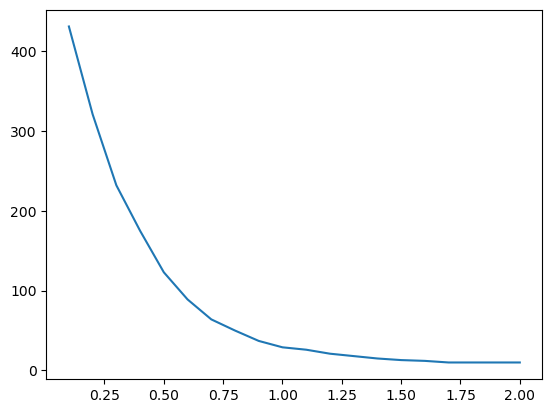

In [117]:
plot_df = pd.DataFrame({round(predictr.alpha, 8):(predictr.coef_ != 0).sum() for predictr in predictrs}, index = [0]).stack().reset_index()\
.drop('level_0', axis = 1).rename({'level_1':'alpha', 0:'Non Zero Coef'}, axis = 1)

plt.plot(plot_df.alpha, plot_df['Non Zero Coef'])
plt.show()

> alpha의 값이 커질수록 기울기가 0이 아닌 계수값들이 줄어드는 것을 볼 수 있다. 이는 Lasso가 몇 개의 설명변수만으로 기울기를 설명하도록 하여 공선성을 줄이는데, alpha값에 따라 해당 개수의 패널티가 강화되기 때문이다.

> 차이점 : 2번은 kaggle competition과 유사한 느낌... test score를 반영
>
> 3번은 코딩문제 느낌... 지시사항을 잘 수행했는지... 그리고 구현을 하지 못하면 부분점수는 없다.